## Assignment 9

In [1]:
import pandas as pd
import numpy as np
import warnings

warnings.filterwarnings("ignore")

df = pd.read_csv("heart.csv")

In [2]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [3]:
df.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [4]:
df.shape

(303, 14)

In [5]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,303.0,54.366337,9.082101,29.0,47.5,55.0,61.0,77.0
sex,303.0,0.683168,0.466011,0.0,0.0,1.0,1.0,1.0
cp,303.0,0.966997,1.032052,0.0,0.0,1.0,2.0,3.0
trestbps,303.0,131.623762,17.538143,94.0,120.0,130.0,140.0,200.0
chol,303.0,246.264026,51.830751,126.0,211.0,240.0,274.5,564.0
fbs,303.0,0.148515,0.356198,0.0,0.0,0.0,0.0,1.0
restecg,303.0,0.528053,0.525860,0.0,0.0,1.0,1.0,2.0
thalach,303.0,149.646865,22.905161,71.0,133.5,153.0,166.0,202.0
exang,303.0,0.326733,0.469794,0.0,0.0,0.0,1.0,1.0
oldpeak,303.0,1.039604,1.161075,0.0,0.0,0.8,1.6,6.2


In [8]:
#check for missing values
df.isnull().values.any()

False

In [9]:
continuous_features = []
for column in df.columns:
        if df[column].nunique() >= 10:
            continuous_features.append(column)
continuous_features


['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

In [10]:
discrete_features = []
for column in df.columns:
        if df[column].nunique() < 10:
            discrete_features.append(column)
discrete_features.remove('target')
discrete_features

['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal']

<AxesSubplot:title={'center':'Distribution of Continuos Features - With Outliers'}, ylabel='count'>

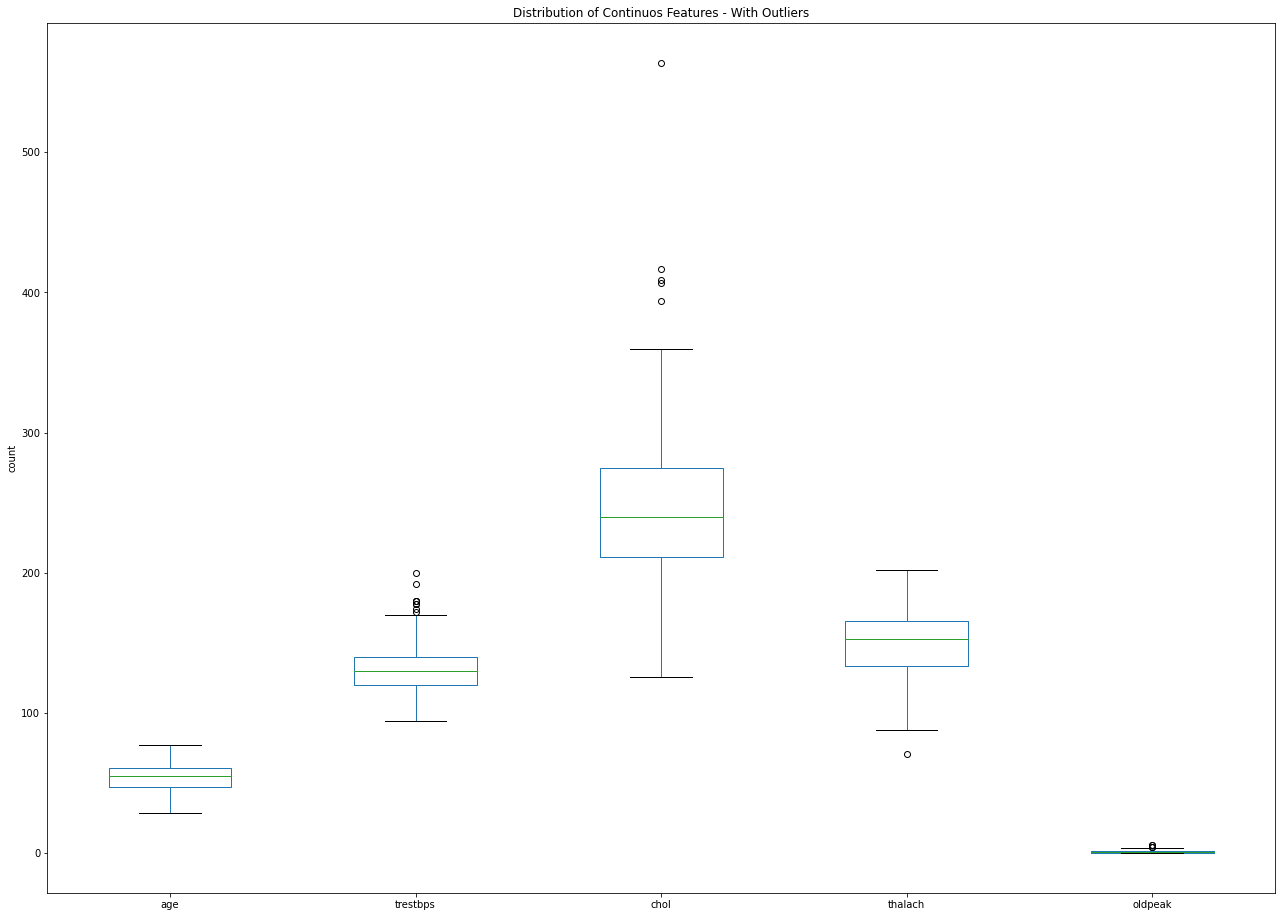

In [11]:
df[continuous_features].plot(kind = 'box',figsize=(22,16),ylabel='count',xlabel='continuos features',title='Distribution of Continuos Features - With Outliers')

There are outliers for: trestbps, chol, thalach and oldpeak

<AxesSubplot:title={'center':'Distribution of Values for oldpeak'}, ylabel='count'>

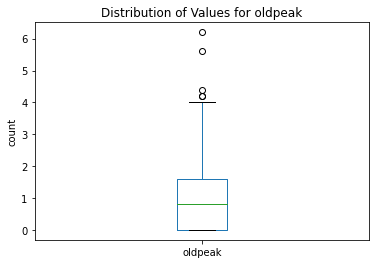

In [12]:
df['oldpeak'].plot(kind='box',ylabel='count',title='Distribution of Values for oldpeak')

In [13]:
#resolution of outliers using IQR
df_iqr = df
Q1 = df_iqr.quantile(0.25)
Q3 =df_iqr.quantile(0.75)

IQR = Q3-Q1

lower_range = Q1-1.5*IQR
upper_range = Q3+1.5*IQR


df_iqr_clean = df_iqr[~((df_iqr<lower_range) | (df_iqr>upper_range)).any(axis=1)]

df_iqr_clean

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
296,63,0,0,124,197,0,1,136,1,0.0,1,0,2,0
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


<AxesSubplot:title={'center':'Distribution of Continuos Features - Resolved Outliers'}, ylabel='count'>

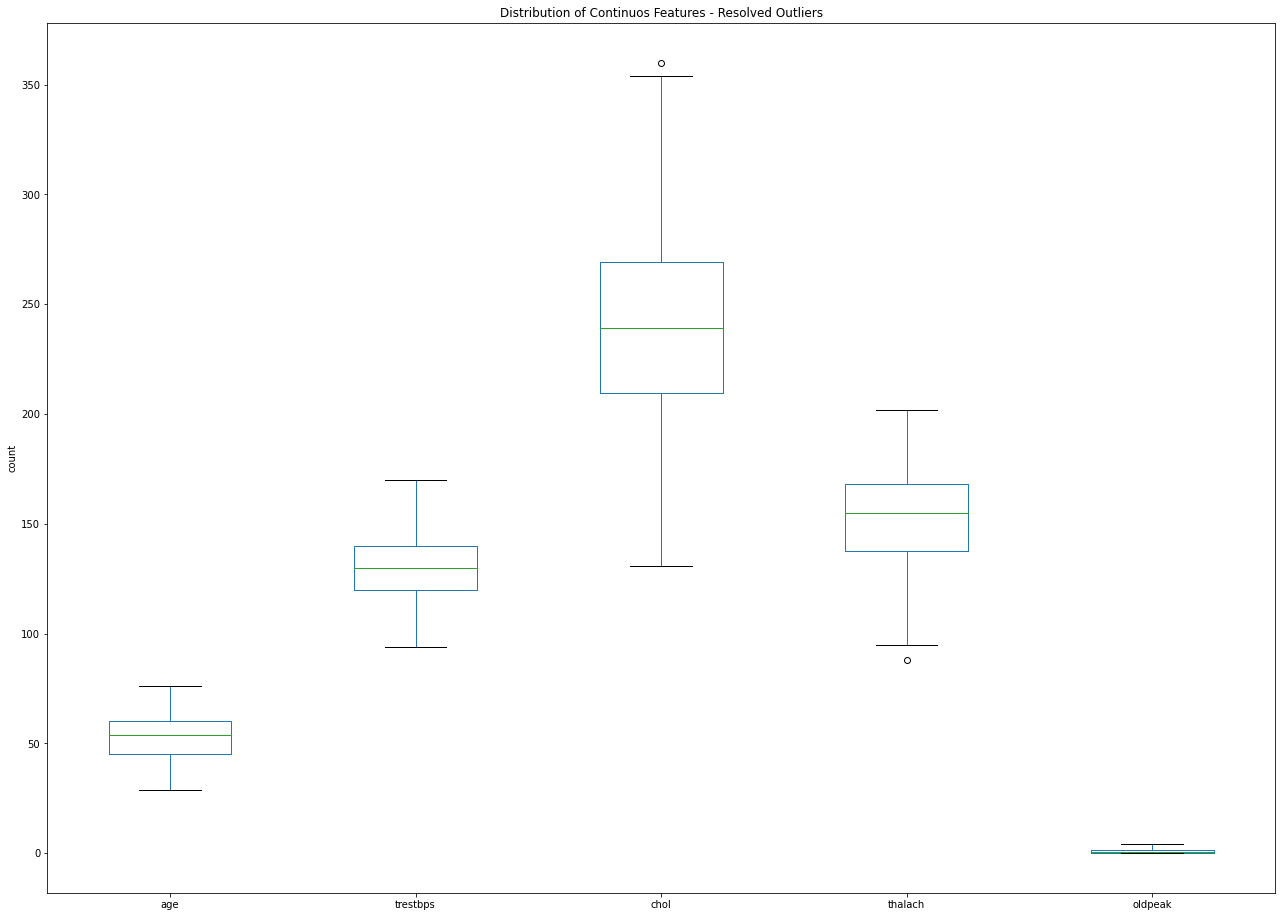

In [14]:
df_iqr_clean[continuous_features].plot(kind = 'box',figsize=(22,16),ylabel='count',xlabel='continuos features',title='Distribution of Continuos Features - Resolved Outliers')

In [15]:
continuous_features

['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

In [16]:
bin_continuous_features = []
for column in df.columns:
        if df[column].nunique() >= 10:
            bin_continuous_features.append(column)
bin_continuous_features.remove('oldpeak')
bin_continuous_features

['age', 'trestbps', 'chol', 'thalach']

In [17]:
#create 8 bins for each of the binned columns 
#replace the values of the binned columns with their allocated bin int

for column in df_iqr_clean[bin_continuous_features]:
      df_iqr_clean[column] = pd.qcut(df_iqr_clean[column],q=8,labels=False,precision=0)
df_iqr_clean

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
1,0,1,2,3,4,0,1,7,0,3.5,0,0,2,1
2,0,0,1,3,1,0,0,6,0,1.4,2,0,2,1
3,4,1,1,1,3,0,1,7,0,0.8,2,0,2,1
4,4,0,0,1,7,0,1,5,1,0.6,2,0,2,1
5,4,1,0,5,0,0,1,3,0,0.4,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
296,6,0,0,3,1,0,1,1,1,0.0,1,0,2,0
298,4,0,0,5,4,0,1,1,1,0.2,1,0,3,0
299,1,1,3,0,5,0,1,1,0,1.2,1,0,3,0
301,4,1,0,3,0,0,1,0,1,1.2,1,1,3,0


In [18]:
#df_iqr_clean['age_mean']= df_iqr_clean['age'].mean()

In [19]:
#Separating features from labels
X = df_iqr_clean.drop('target',axis=1)
y = df_iqr_clean['target']

In [20]:
#Numerical features hence we can use Wrapper method using Backward elimination
#This method is more accurate and it won't be expensive since there are less than 20 features

import statsmodels.api as sm

#Adding constant column of ones, mandatory for sm.OLS model
X_1 = sm.add_constant(X)

#Fitting sm.OLS model
model = sm.OLS(y,X_1).fit()
model.pvalues

const       1.006486e-12
age         9.304926e-01
sex         5.937047e-05
cp          4.469091e-04
trestbps    2.011280e-01
chol        5.473922e-01
fbs         9.494181e-05
restecg     4.982870e-01
thalach     1.103337e-01
exang       2.214018e-01
oldpeak     1.011722e-01
slope       1.540120e-02
ca          3.819958e-06
thal        2.473712e-06
dtype: float64

In [21]:
#Backward Elimination
cols = list(X.columns)
pmax = 1
while (len(cols)>0):
    p= []
    X_1 = X[cols]
    X_1 = sm.add_constant(X_1)
    model = sm.OLS(y,X_1).fit()
    p = pd.Series(model.pvalues.values[1:],index = cols)      
    pmax = max(p)
    feature_with_p_max = p.idxmax()
    if(pmax>0.05):
        cols.remove(feature_with_p_max)
    else:
        break
selected_features_BE = cols
print(selected_features_BE)

['sex', 'cp', 'fbs', 'thalach', 'oldpeak', 'slope', 'ca', 'thal']


In [22]:
#drop columns that were not selected by the feature selection model

X = X[selected_features_BE]
X

,sex,cp,fbs,thalach,oldpeak,slope,ca,thal
1,1,2,0,7,3.5,0,0,2
2,0,1,0,6,1.4,2,0,2
3,1,1,0,7,0.8,2,0,2
4,0,0,0,5,0.6,2,0,2
5,1,0,0,3,0.4,1,0,1
...,...,...,...,...,...,...,...,...
296,0,0,0,1,0.0,1,0,2
298,0,0,0,1,0.2,1,0,3
299,1,3,0,1,1.2,1,0,3
301,1,0,0,0,1.2,1,1,3


In [23]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=0)

X_train.shape, y_train.shape,X_test.shape,y_test.shape

((159, 8), (159,), (69, 8), (69,))

In [24]:
#Feature scaling using RobustScaler


from sklearn.preprocessing import RobustScaler

# scale trainig set
X_train_rs = pd.DataFrame(RobustScaler().fit_transform(X_train), columns=X_train.columns)

#scale test set
X_test_rs = pd.DataFrame(RobustScaler().fit_transform(X_test), columns=X_test.columns)

In [31]:
#Classification Methods:
#1. Random Forests 
#2. Support Vector Machine 
#3. Logistic Regression
#4. Naive Bayes Classifier

#RandmForests

from sklearn.ensemble import RandomForestRegressor

# Setup random seed
np.random.seed(42)

model = RandomForestRegressor()

model.fit(X_train_rs, y_train)

#evaluate RandmForests model on train and test sets

print(f"Model score on train set: {model.score(X_train_rs, y_train)*100}%")
print(f"Model score accuracy on test set: {model.score(X_test_rs, y_test)*100}%")
# Take mean of 5-fold cross-validation
print(f"Cross-validation score: {np.mean(cross_val_score(model, X, y, cv=4)) * 100}%")



Model score on train set: 89.53447201829805%
Model score accuracy on test set: 31.127533999719446%
Cross-validation score: 8.764729549501427%


In [32]:
from sklearn.svm import SVC


#Support Vector Machine Classifier

model = SVC(kernel='linear')

model.fit(X_train_rs,y_train)

#evaluate Support Vector Machine Classifier model on train and test sets

print(f"Model score on train set: {model.score(X_train_rs, y_train)*100}%")
print(f"Model score accuracy on test set: {model.score(X_test_rs, y_test)*100}%")
# Take mean of 5-fold cross-validation
print(f"Cross-validation score: {np.mean(cross_val_score(model, X, y, cv=5)) * 100}%")



Model score on train set: 82.38993710691824%
Model score accuracy on test set: 76.81159420289855%
Cross-validation score: 83.76811594202898%


In [33]:
#Logistic Regression

from sklearn.linear_model import LogisticRegression

model = LogisticRegression()

model.fit(X_train_rs,y_train)

#evaluate Logistic Regression model on train and test sets

print(f"Model score on train set: {model.score(X_train_rs, y_train)*100}%")
print(f"Model score accuracy on test set: {model.score(X_test_rs, y_test)*100}%")
# Take mean of 5-fold cross-validation
print(f"Cross-validation score: {np.mean(cross_val_score(model, X, y, cv=5)) * 100}%")

Model score on train set: 85.53459119496856%
Model score accuracy on test set: 75.36231884057972%
Cross-validation score: 84.6086956521739%


In [34]:
 #Naive Bayes Classifier using Gaussian Naive Bayes

from sklearn.naive_bayes import GaussianNB

model = GaussianNB()

model.fit(X_train_rs,y_train)

#evaluate Gaussian Naive Bayes model on train and test sets

print(f"Model score on train set: {model.score(X_train_rs, y_train)*100}%")
print(f"Model score accuracy on test set: {model.score(X_test_rs, y_test)*100}%")
# Take mean of 5-fold cross-validation
print(f"Cross-validation score: {np.mean(cross_val_score(model, X, y, cv=5)) * 100}%")


Model score on train set: 83.64779874213836%
Model score accuracy on test set: 78.26086956521739%
Cross-validation score: 83.34299516908213%


The best machine learning model is Gaussian Naive Bayes Classifier

In [36]:
from sklearn.model_selection import GridSearchCV


